100.0%


(10000, 3, 32, 32) (10000,)
K-means Clustering Accuracy: 70.76%


<Figure size 800x600 with 0 Axes>

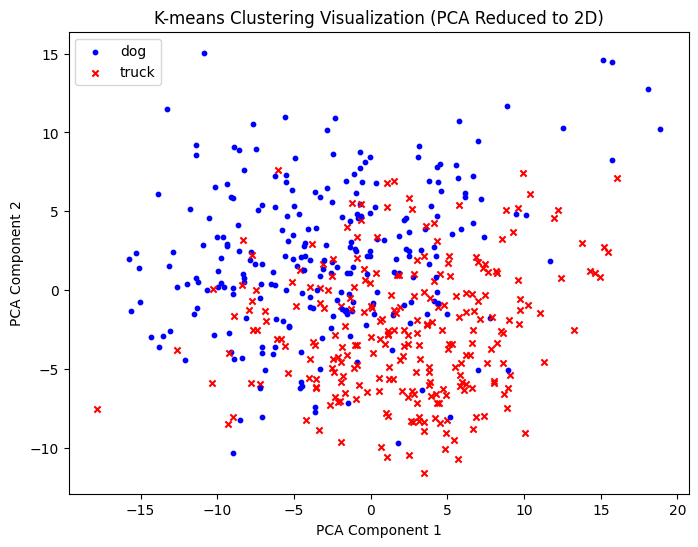

In [8]:
#-------------------------------------------------- **第一區不可動,載入必要資料**-------------------------------------------------------------------
import torchvision
import torchvision.transforms as transforms
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
import numpy as np
import cv2
import matplotlib.pyplot as plt
import random


# **載入 CIFAR-10 數據集並提取狗與卡車影像**
transform = transforms.Compose([transforms.ToTensor()])
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)


airplane_images, ship_images = [], []
for img, label in trainset:
    if label == 5 and len(airplane_images) < 5000:
        airplane_images.append(img.numpy())
    elif label == 9 and len(ship_images) < 5000:
        ship_images.append(img.numpy())
    if len(airplane_images) >= 5000 and len(ship_images) >= 5000:
        break

images = np.concatenate((airplane_images, ship_images), axis=0)
labels = np.array([0] * 5000 + [1] * 5000)
print(images.shape, labels.shape)


#-------------------------------------------------- **第二區可動，以下為同學自行提取特徵features**-------------------------------------------------------------------
#想要把這區全部改掉也可以
#範例

def extract_features(image):
    #灰階特徵
    # feature = cv2.cvtColor((image.transpose(1, 2, 0) * 255).astype(np.uint8), cv2.COLOR_RGB2GRAY).flatten()

    #彩色特徵
    feature = image.flatten()
    return feature


# 提取所有影像的特徵
features = np.array([extract_features(img) for img in images])

#-------------------------------------------------- **第三區不可動,將features丟進Kmeans裡面**-------------------------------------------------------------------
# **K-means 聚類**
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(features)
predicted_labels = kmeans.labels_

# 修正標籤與計算準確度
if np.mean(predicted_labels[:5000]) > 0.5:
    predicted_labels = 1 - predicted_labels
accuracy = accuracy_score(labels, predicted_labels)
print(f"K-means Clustering Accuracy: {accuracy * 100:.2f}%")

# **降維 (PCA)**
pca = PCA(n_components=2)  # 將特徵降維到 2 維
features_2d = pca.fit_transform(features)

# **繪製分群結果，藍色圓圈與紅色叉叉，並添加圖例**
plt.figure(figsize=(8, 6))

# 隨機選取 100 個點的索引
sample_indices = random.sample(range(features_2d.shape[0]), 500)

# **繪製分群結果，藍色圓圈與紅色叉叉，並添加圖例**
plt.figure(figsize=(8, 6))

for i in sample_indices:
    if labels[i] == 0:
        plt.scatter(features_2d[i, 0], features_2d[i, 1], color='blue', marker='o', s=10, label='dog' if 'dog' not in plt.gca().get_legend_handles_labels()[1] else "")
    else:
        plt.scatter(features_2d[i, 0], features_2d[i, 1], color='red', marker='x', s=20, label='truck' if 'truck' not in plt.gca().get_legend_handles_labels()[1] else "")

# 添加圖例，避免重複顯示
plt.legend(loc='best')
plt.title("K-means Clustering Visualization (PCA Reduced to 2D)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()


Files already downloaded and verified


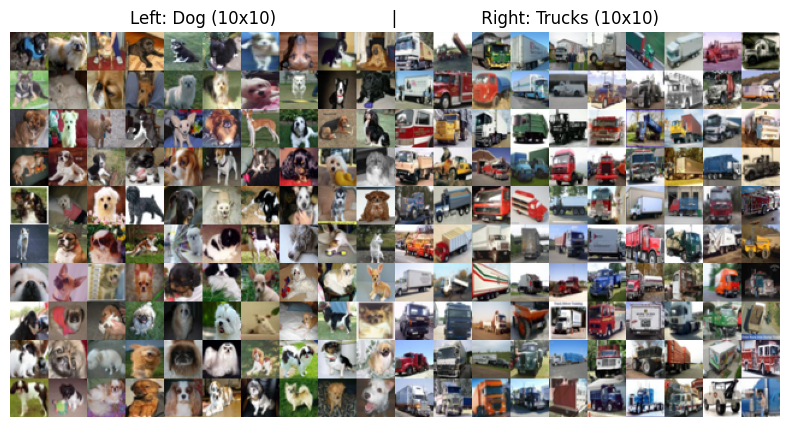

In [2]:
#畫圖程式 可以刪掉
import torchvision
import torchvision.transforms as transforms
import numpy as np
import matplotlib.pyplot as plt

# **載入 CIFAR-10 數據集並提取狗與卡車影像**
transform = transforms.Compose([transforms.ToTensor()])
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)

frog_images, truck_images = [], []
for img, label in trainset:
    if label == 5 and len(frog_images) < 100:  # 狗
        frog_images.append(img.numpy())
    elif label == 9 and len(truck_images) < 100:  # 卡車
        truck_images.append(img.numpy())
    if len(frog_images) >= 100 and len(truck_images) >= 100:
        break

# 將狗和卡車的影像排列成 10x10
frog_grid = np.concatenate([np.concatenate(frog_images[i * 10:(i + 1) * 10], axis=2) for i in range(10)], axis=1)
truck_grid = np.concatenate([np.concatenate(truck_images[i * 10:(i + 1) * 10], axis=2) for i in range(10)], axis=1)

# 合併左邊的狗和右邊的卡車
combined_image = np.concatenate((frog_grid, truck_grid), axis=2)

# 調整維度以適應 Matplotlib
combined_image = combined_image.transpose(1, 2, 0)

# 顯示結果
plt.figure(figsize=(10, 5))
plt.imshow(combined_image)
plt.title("Left: Dog (10x10)                      |                Right: Trucks (10x10)")
plt.axis('off')
plt.show()